# <span class="tema">(Text)</span> Subseqüència repetida més llarga

Donada una cadena de caràcters verificar si conté una seqüència de caràcters repetida. La seqüència ha de contenir com a mínim 2 caràcters i cada repetició ha de tenir els seus propis caràcters, no es poden solapar.

seqRepetida('BANANA') --> Hauria de retornar: conté AN com a seqüència repetida (o NA)<br>
seqRepetida('AABAABAABA') --> Hauria de retornar: conté AABA com a seqüència repetida (atenció AA o AAB no serveixen perquè no són la més llarga)<br>
seqRepetida('XXXXXX') --> Hauria de retornar: conté XXX com a seqüència repetida<br>
seqRepetida('ABCCBA') --> Hauria de retornar: no conté cap seqüència repetida<br>
seqRepetida('ABBA') --> Hauria de retornar: no conté cap seqüència repetida<br>
seqRepetida('XYBZXAXBZ') --> Hauria de retornar: conté BZ com a seqüència repetida<br>
seqRepetida('ABRACADABRA') --> Hauria de retornar: conté ABRA com a seqüència repetida<br>
seqRepetida('BABABABABA') --> Hauria de retornar: conté BABA com a seqüència repetida<br>

### Conceptualització problema

#### Quines col.leccions has usat? Perquè?

He utilitzat només un `set()` i una `list()`. El `set` l'he utilitzat per a que `candidates` no contigués repetits, i la `list` per a poder utilitzar la funció `max` sobre `candidates`.

<br>

#### Enumera les operacions que has fet amb aquestes col.leccions i busca la seva complexitat. Calcula la complexitat de tot l'algorisme

El procés és simple:

1. Una `set` comprehension per a generar totes les subsequencies possibles.
2. Trobem el màxim de `candidates` respecte a `len`. En cas de que el `set` sigui buit, retornem `None`.

<br>

A partir d'ara suposem que tenim una cadena d'entrada $X$ amb llargada $n$.

Primerament, sabem que la complexitat de `max` és $O(n)$ [1]. 
La complexitat de l'algortime utilitzat és $O(n^2)$ ja que:
$$ 2 \cdot \sum_{i=i}^{n-1} \cdot \sum_{j=i+2}^{n} 1 + O(n) + 1 = 2O(n^2) + O(n) + 1 = O(n^2) $$
Al final d'aquest notebook he afegit una *demostració* gràfica de que la complexitat donada és correcte.


<br>

**Referències**:
1. [TimeComplexity](https://wiki.python.org/moin/TimeComplexity).

### Implementació

In [1]:
def repetida(paraula):
    candidates = set(paraula[i:j] 
                     for i in range(len(paraula)) 
                     for j in range(i + 2, len(paraula) + 1) 
                     if (paraula[i:j] in paraula[j:] or paraula[i:j] in paraula[:i])
                    )
    
    return max(list(candidates), key=len) if candidates != set() else None

print(repetida("abba"))

None


In [2]:
def pretty_repetida(paraula):
    rep = repetida(paraula)
    ret = "\"{}\"".format(rep) if rep is not None else "subsequence not found"
    return "repetida(\"{p}\") = {r}".format(p=paraula, r=ret)

In [3]:
print(pretty_repetida("BABABABABA"))

repetida("BABABABABA") = "BABA"


### Testeig

#### Tests de l'enunciat

In [4]:
import sys
import traceback

try:
    print("Running tests...")
    assert repetida("BANANA") in ["AN", "NA"]
    assert repetida("AABAABAABA") == "AABA"
    assert repetida("XXXXXX") == "XXX"
    assert repetida("ABCCBA") == None
    assert repetida("ABBA") == None
    assert repetida("XYBZXAXBZ") == "BZ"
    assert repetida("ABRACADABRA") == "ABRA"
    assert repetida("BABABABABA") in ["BABA", "ABAB"]
    print("Ran 8 tests.")
    print("OK")
    
except AssertionError:
    _, _, tb = sys.exc_info()
    traceback.print_tb(tb)
    tb_info = traceback.extract_tb(tb)
    filename, line, func, text = tb_info[-1]

Running tests...
Ran 8 tests.
OK


#### Benchmark

In [5]:
from string import ascii_uppercase
from random import choice
from time import time

def random_str(size):
    return "".join(choice(ascii_uppercase) for _ in range(size))

def random_test(m, M, s):
    it, tt = [], []
    t = time()
    
    print("Running benchmark...")
    for i in range(m, M+1, s):
        _t = time() 
        _ = repetida(random_str(i))
        _t = time() - _t
        
        it.append(i)
        tt.append(_t)
        
    print("Done, ran {} tests in {:4.6} s.".format((M - m) // s, time() - t))
    
    return it, tt

Running benchmark...
Done, ran 1000 tests in 117.025 s.


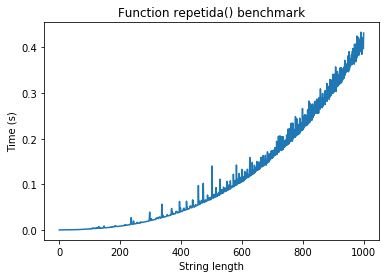

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

MIN, MAX, STEP = 0, 10**3, 1
x, y = random_test(MIN, MAX, STEP)

plt.title("Function repetida() benchmark")
plt.xlabel("String length")
plt.ylabel("Time (s)")

plt.plot(x, y)

plt.show()

#### Demostració complexitat $O(n^2)$

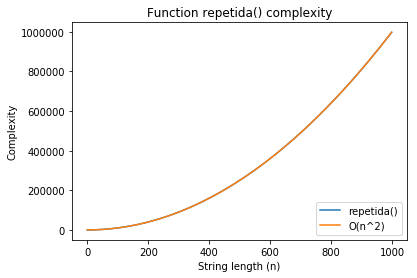

In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

MIN, MAX, STEP = 0, 10**3, 1

plt.title("Function repetida() complexity")
plt.xlabel("String length (n)")
plt.ylabel("Complexity")

x = np.arange(MIN, MAX, STEP)
y1 = [sum(
            [sum([2 for _ in range(ii + 2, i + 1)])
            for ii in range(i)
        ]) + i + 1
      for i in x]

y2 = [i**2 for i in x]

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(labels=("repetida()", "O(n^2)"), loc='lower right')

plt.show()

### Avaluació (0 a 10 punts)


Concepte | Puntuació 
--- | --- 
Solució correcta de complexitat O($n^3$) | **8** punts
Bon ús col.leccions | **+1** punt
Solució correcta de complexitat > O($n^3$) | **3** punts 
Codi comentat i seguint estàndar PEP8 | **+1** punt 
S'ofereix una funció adicional per mostrar la solució elegantment| **+0.5** punts 
L'algorisme falla repetidament | **-7** punts 
L'algorisme falla en algun cas excepcional | **-2** punt
No es donen prous exemples d'execució | **-1** punt
Codi, noms de variables, solució o comentaris no prou clars | **-1** punt
La funció o els paràmetres no s'anomenen com a l'exemple | **-1** punt